Nama : Ricky Hermanto

# VIE Final Project - Loan Credit

## Business Understanding:

Machine learning (ML), bagian dari kecerdasan buatan (artificial intelligence), merupakan metode untuk mengoptimalkan performa dari sistem dengan mempelajari data sampel atau data histori (Alpaydin, 2009). Dalam kehidupan sehari-hari, obyek dapat diidentifikasi dengan mudah oleh manusia, namun belum tentu dapat dijelaskan secara spesifik. Di sinilah peran ML dalam mengenali, mengidentifikasi, ataupun memprediksi data tertentu dengan mempelajari data histori (experience data). Dengan ML, model dibuat baik secara langsung ataupun tidak, dengan mengekstrak pengetahuan dari pakar ataupun dari data yang bahkan belum diketahui hubungannya dengan cara mempelajarinya dengan algoritme tertentu.

Manfaat dari teknologi machine learning tersebut dapat kita rasakan saat ini seperti pada bidang teknologi, bisnis, pemasaran, Pendidikan, Kesehatan dan masih banyak yang lainnya.

Dalam final projek ini saya akan mencoba membangun sebuah Classification model loan credit untuk memprediksi nasabah mana yang termasuk dalam kategori good loan dan bad loan sehingga dapat digunakan di masa depan untuk memprediksi nasabah mana yang akan gagal bayar atau tidak. Dataset yang digunakan di sini memiliki historis data pinjaman selama 7 tahun yang diambil dari client PT. ID/X Partners. Dengan melihat status pinjaman, kita dapat memeriksa apakah pinjaman tersebut diberikan kepada nasabah atau tidak. Jika status pinjaman "charged off" atau "default" atau the issuance of loan got delayed by 31-120 days, itu adalah pinjaman macet('bad loan').


## Data Understanding :

Kumpulan datanya mencakup data - data nasabah yang pernah memakai produk kredit client PT.ID/X Partners. Dari total 466285 baris data yang ada terdapat 87.73% adalah label 1 atau klasifikasi baik kepada pelanggan yang taat bayar credit. Kumpulan data ini sangat tidak seimbang, dengan klasifikasi buruk menyumbang 12.27% dari total data yang ada. Kumpulan datanya juga memiliki banyak nan value pada kolom - kolom featurenya. feature 'loan_status' merupakan label class yang akan digunakan untuk memprediksi nantinya, sebelum dipakai karena ada beberapa kategori dalam 'loan_status', maka harus terlebih dahulu dikelompokkan kedalam label 1 (good loan) dan 0 (bad loan).

## Table of Contents
1. [Importing dependencies](#p1)
   * [load dataset](#p1-1)
   * [Data Preprocessing](#p1-2)
2. [Exploratory data analysis](#p2)
3. [Splitting the data into train & test data](#p3)
   * [Feature Engineering](#p3-1)
   * [Feature Selection](#p3-2)
4. [Model Building](#p4)
5. [Cross Validation](#p5)
6. [Saving Model](#p6)

## <a name="p1">Importing Dependencies</a>

In [ ]:
#!pip install PCA
#!pip install perceptron
#!pip install association_metrics
#!pip install xverse
#!pip install scorecardpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import pandas as pd
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)
import numpy as np
import time
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, f_classif
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway

from scipy import stats
from scipy.stats import norm, skew,skewtest
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scorecardpy as sc

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, StandardScaler, OneHotEncoder, MaxAbsScaler, RobustScaler, PowerTransformer

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn import tree as tr

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,plot_confusion_matrix,f1_score

import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
import random

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## <a name="p1-1">Load Dataset</a>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <a name="p1-2">Data Preprocessing</a>

In [ ]:
df.isna().sum()/len(df)*100

Unnamed: 0                       0.000000
id                               0.000000
member_id                        0.000000
loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
grade                            0.000000
sub_grade                        0.000000
emp_title                        5.916553
emp_length                       4.505399
home_ownership                   0.000000
annual_inc                       0.000858
verification_status              0.000000
issue_d                          0.000000
loan_status                      0.000000
pymnt_plan                       0.000000
url                              0.000000
desc                            72.981546
purpose                          0.000000
title                            0.004289
zip_code                         0

Dari hasil pengamatan saya diatas, ada beberapa feature yang memiliki banyak sekali missing value > 70%, fitur - fitur tersebut akan saya drop karna tidak akan memberikan insight dan pengaruh yang bagus juga untuk model nantinya. Dan juga saya drop beberapa feature yang memiliki variansi data yang tinggi seperti title, id,member_id, dll. karna feature dengan variansi yang tinggi akan berpengaruh ke kompleksitas model nantinya. lalu untuk addr_state, juga saya lakukan drop karna kalo dalam real case menurut saya, wilayah akan menyebabkan machine learning mendiskriminasi suatu daerah, padahal pada faktanya tidak seperti itu, misal pada daerah A banyak yang ber label Bad loan hasil dari prediksi machine learning, padahal faktanya tidak seperti itu.  

In [ ]:
columns_to_drop = ['Unnamed: 0','id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code','application_type','mths_since_last_delinq',
                  'addr_state']
df.drop(columns=columns_to_drop, inplace=True, axis=1)

In [ ]:
df.isna().sum()/len(df)*100

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
emp_length                     4.505399
home_ownership                 0.000000
annual_inc                     0.000858
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.006219
earliest_cr_line               0.006219
inq_last_6mths                 0.006219
open_acc                       0.006219
pub_rec                        0.006219
revol_bal                      0.000000
revol_util                     0.072917
total_acc                      0.006219
initial_list_status            0.000000


untuk missing value yang tersisa, akan saya handle dengan beberapa teknik mulai dari imputation, dan dropna. untuk imputation akan saya lakukan setelah train test split dan dropna pada data preprocessing sekarang. Why ? karna saya tidak mau terjadi
"data leakage" pada model saya yang menyebabkan modelnya bias, "too perfect", serta hasil dari prediksinya tidak bisa dijadikan patokan untuk pengambilan keputusan.

In [ ]:
df[(df["annual_inc"].isna())].shape

(4, 38)

In [ ]:
df = df.dropna(subset=['annual_inc']).reset_index(drop=True)
df.shape

(466281, 38)

In [ ]:
df[(df['delinq_2yrs'].isna())].shape

(25, 38)

In [ ]:
df.isnull().sum()/len(df) * 100

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
emp_length                     4.505438
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.005362
earliest_cr_line               0.005362
inq_last_6mths                 0.005362
open_acc                       0.005362
pub_rec                        0.005362
revol_bal                      0.000000
revol_util                     0.072060
total_acc                      0.005362
initial_list_status            0.000000


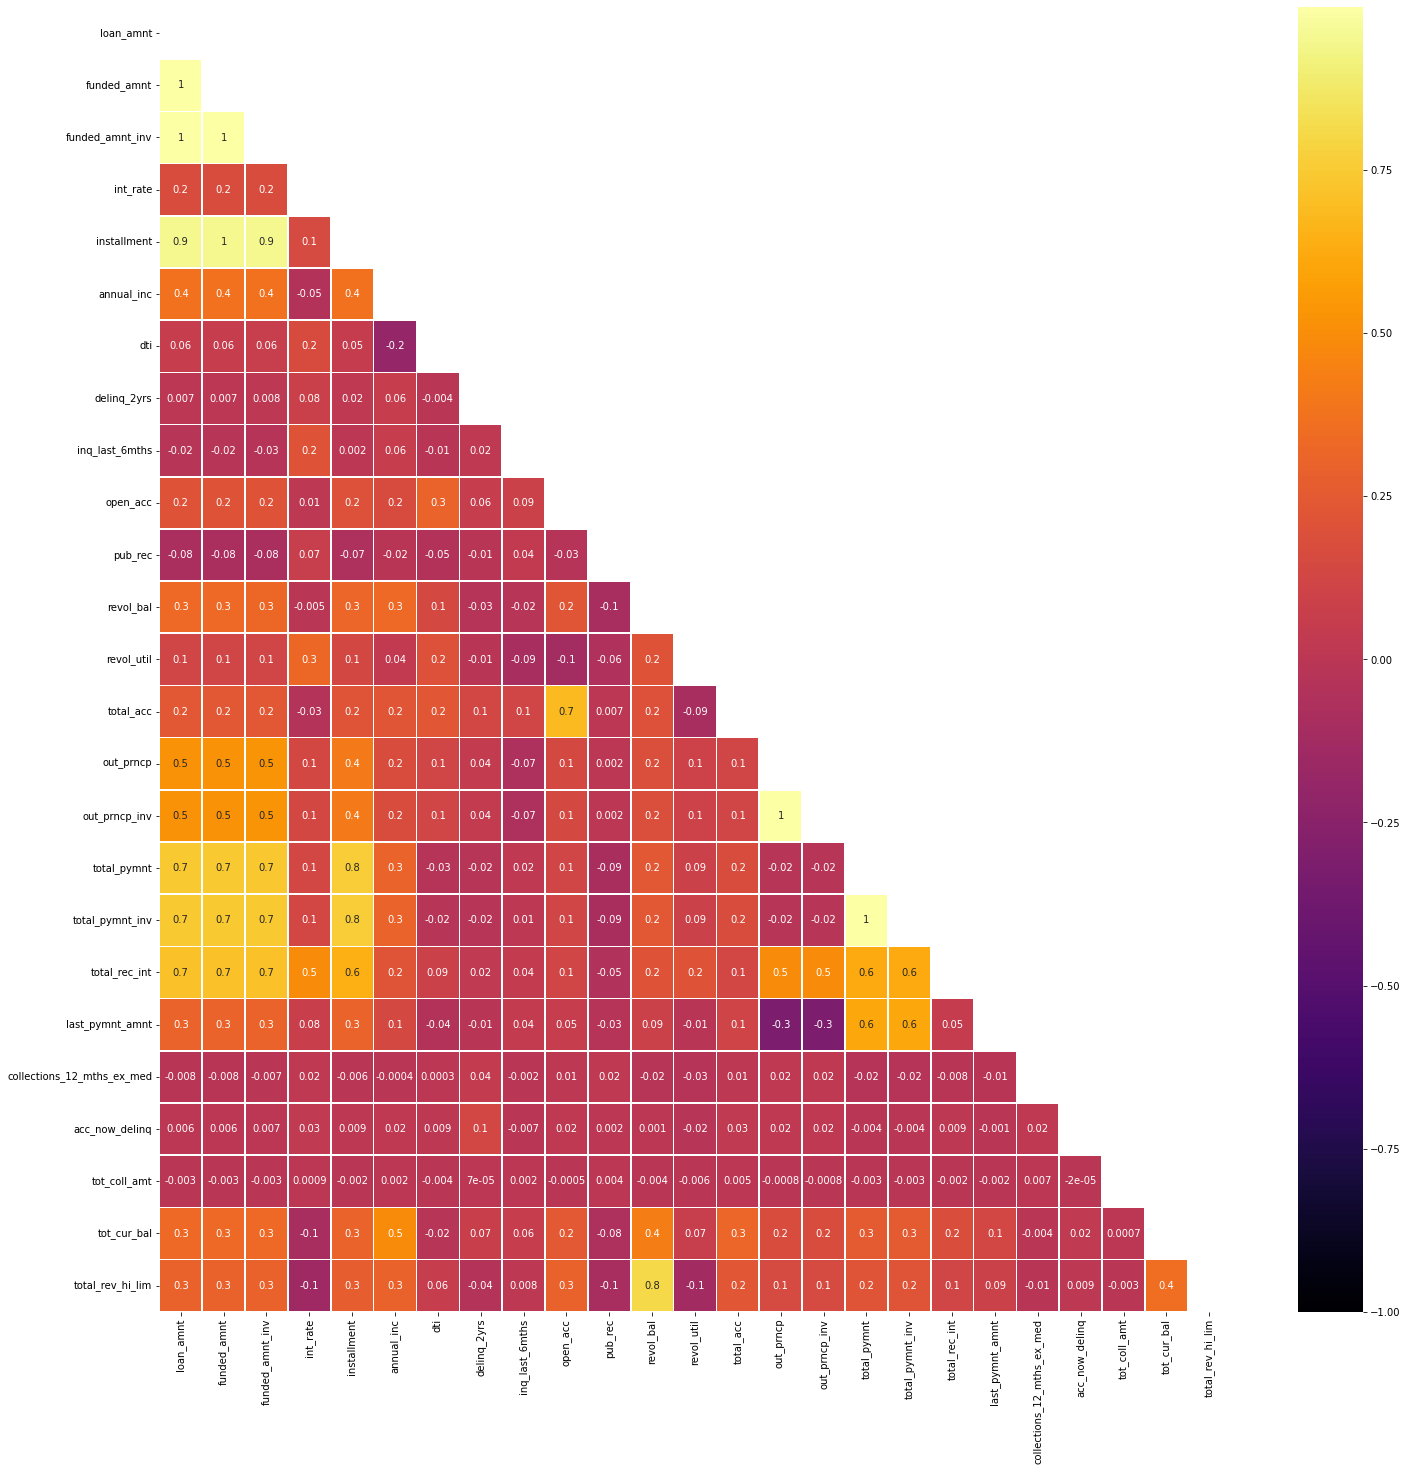

In [ ]:
# correlation matrix dengan correlation co-effiecients
mask = np.zeros_like(df.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

bisa dilihat dari heatmap diatas, ada beberapa feature yang memiliki kolinearitas yang tinggi. hal ini akan berpengaruh pada realibilitas model nantinya. jadi kita akan drop feature - feature tersebut.

In [ ]:
df.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

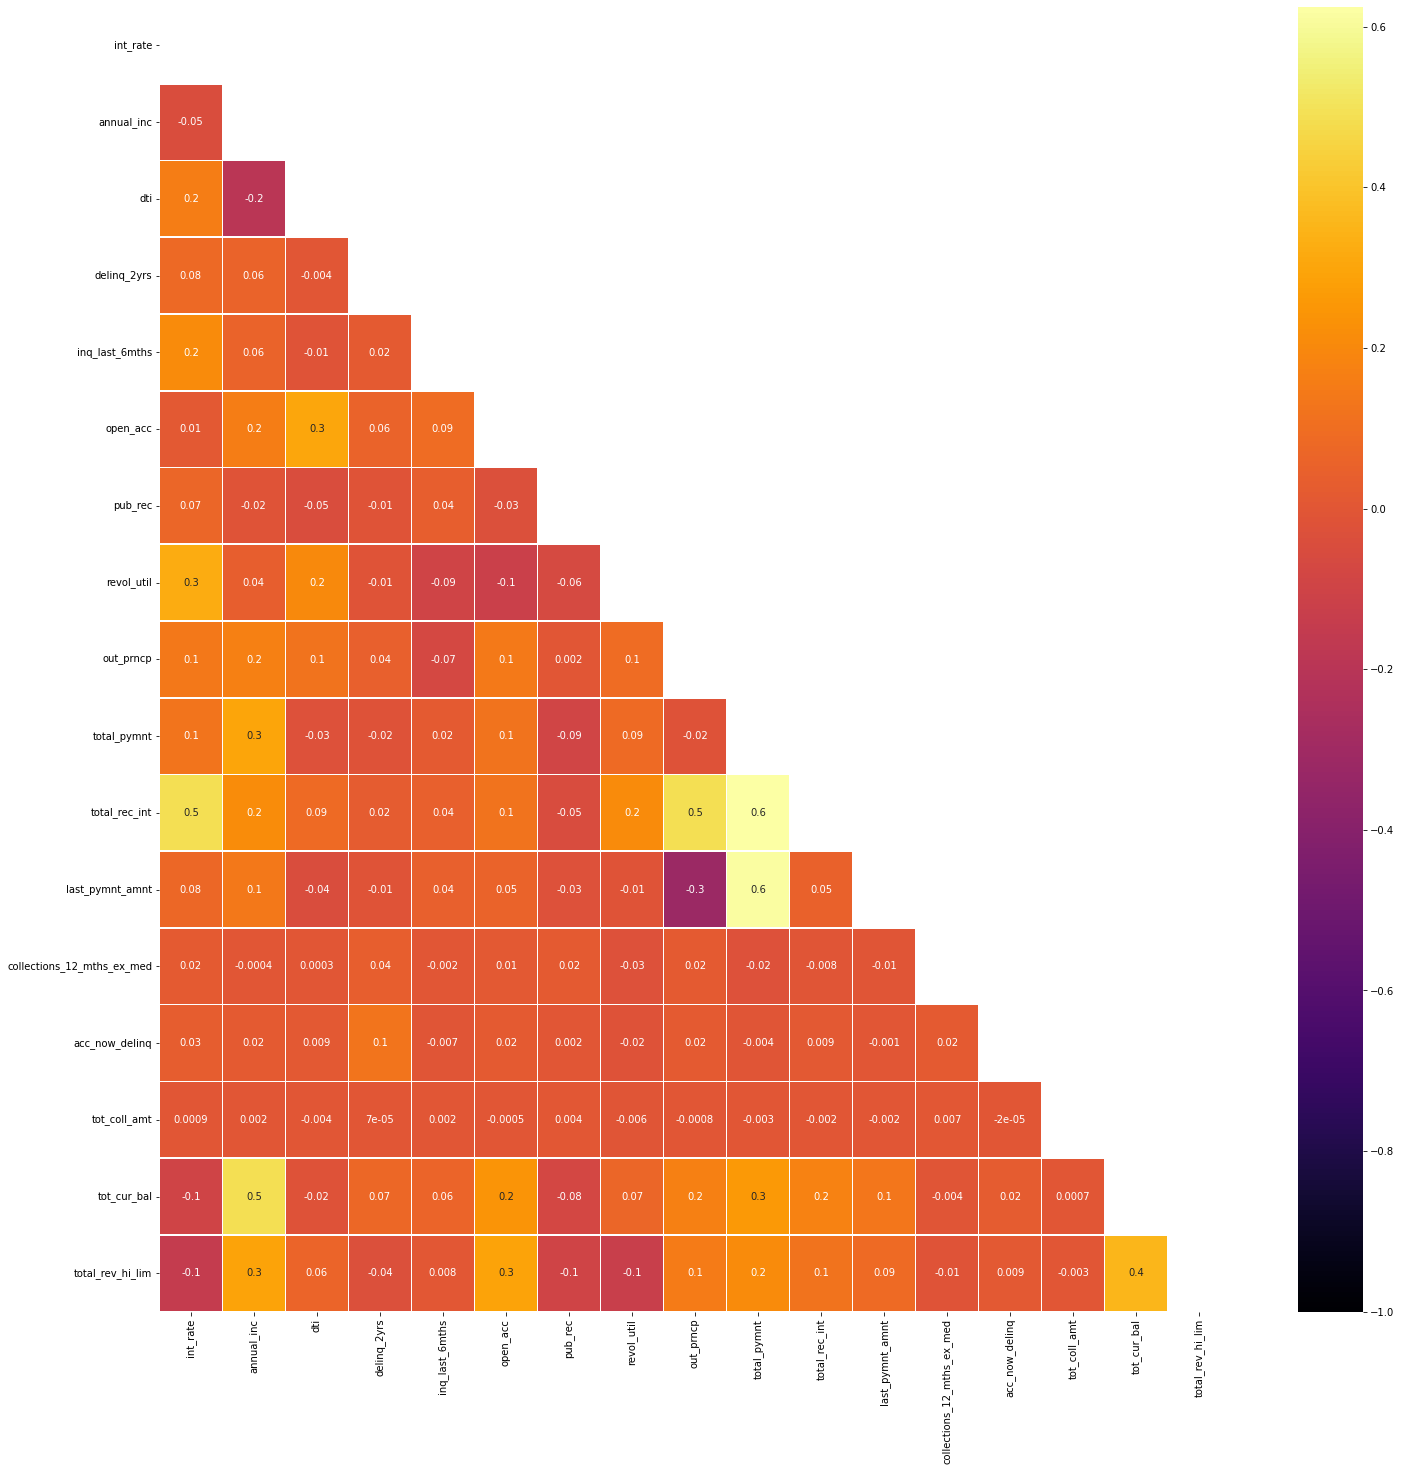

In [ ]:
mask = np.zeros_like(df.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [ ]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466281.000000,4.662810e+05,466281.000000,466256.000000,466256.000000,466256.000000,466256.000000,465945.000000,466281.000000,466281.000000,466281.000000,466281.000000,466140.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,13.829287,7.327738e+04,17.218891,0.284678,0.804745,11.187069,0.160564,56.176947,4410.100174,11540.724389,2588.692644,3123.938895,0.009085,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,4.357570,5.496357e+04,7.851023,0.797365,1.091598,4.987526,0.510863,23.732628,6355.092901,8265.651888,2483.814713,5554.754608,0.108648,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,5.420000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.990000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,39.200000,0.000000,5552.120000,957.330000,312.620000,0.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,13.660000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,57.600000,441.770000,9419.430000,1818.880000,545.960000,0.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,16.490000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,74.700000,7341.650000,15308.330220,3304.540000,3187.910000,0.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,26.060000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,892.300000,32160.380000,57777.579870,24205.620000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


seperti yang terlihat diatas bahwa ada beberapa feature yang berisikan data waktu, data ini tidak bisa langsung dipakai. tapi harus dikonversikan ke bentuk int atau float agar bisa dipakai.

In [ ]:
def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = round(pd.to_numeric(df[column]))
    df[column].fillna(value = 0, inplace = True)


emp_length_convert(df, 'emp_length')

df['emp_length'] = pd.to_numeric(df['emp_length'])

In [ ]:
df['emp_length'].dtype

dtype('float64')

untuk feature emp_length, yang saya lihat di deskripsi merupakan lamanya nasabah sudah bekerja, jadi untuk missing value yang ada pada emp_length akan saya konversikan ke 0, dengan asumsi bahwa nasabah tersebut belum bekerja atau pengalaman kerjanya dibawah 1 tahun.

In [ ]:
def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))

term_numeric(df, 'term')

In [ ]:
df['term'].dtype

dtype('int64')

In [ ]:
# preprocessing date columns

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2022-06-25')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)


date_columns(df, 'issue_d')
date_columns(df, 'last_pymnt_d')
date_columns(df, 'last_credit_pull_d')
date_columns(df, 'earliest_cr_line')


In [ ]:
df.isna().sum()/len(df)*100

term                              0.000000
int_rate                          0.000000
grade                             0.000000
emp_length                        0.000000
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
purpose                           0.000000
dti                               0.000000
delinq_2yrs                       0.005362
inq_last_6mths                    0.005362
open_acc                          0.005362
pub_rec                           0.005362
revol_util                        0.072060
initial_list_status               0.000000
out_prncp                         0.000000
total_pymnt                       0.000000
total_rec_int                     0.000000
last_pymnt_amnt                   0.000000
collections_12_mths_ex_med        0.030239
acc_now_delinq                    0.005362
tot_coll_am

In [ ]:
df["home_ownership"].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            46
ANY              1
Name: home_ownership, dtype: int64

feature home_ownership : NONE dan ANY, akan saya masukkan ke Other. karna jumlah datanya yang tergolong sedikit,
dan juga akan bermasalah pada saat encoding pada saat split nanti. karna data pada ANY hanya satu yang menyebakan error
pada data testnya.

In [ ]:
df["home_ownership"] = df['home_ownership'].replace(["NONE","ANY"],["OTHER","OTHER"])

In [ ]:
df["home_ownership"].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          229
Name: home_ownership, dtype: int64

seperti yang sudah dijelaskan diatas bahwa feature loan_status adalah feature yang akan kita jadikan label,
tetapi didalamnya banyak variansi datanya, jadi harus kita kelompokkan dulu. untuk "Current" dan "In Grace Period",
tidak akan saya pakai karna feature - feature tersebut masih belum dapat dipastikan,
apakah data tersebut good_loan atau bad_loan. sedangkan kita maunya data - data yang kita gunakan adalah data - data historis atau data yang sudah terjadi(valid) dan sudah jelas di klasifikasikan kedalam label good atau bad.

In [ ]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1984
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
# filter dan membuat new features berdasarkan loan_status sebagai target variabel
df = df[~(df["loan_status"].isin(["Current","In Grace Period"]))]
df['good_bad'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop kolom original 'loan_status'
df.drop(columns = ['loan_status'], inplace = True)
df["good_bad"].value_counts()

1    187941
0     50968
Name: good_bad, dtype: int64

In [ ]:
df.isna().sum()/len(df)*100

term                              0.000000
int_rate                          0.000000
grade                             0.000000
emp_length                        0.000000
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
pymnt_plan                        0.000000
purpose                           0.000000
dti                               0.000000
delinq_2yrs                       0.010464
inq_last_6mths                    0.010464
open_acc                          0.010464
pub_rec                           0.010464
revol_util                        0.095434
initial_list_status               0.000000
out_prncp                         0.000000
total_pymnt                       0.000000
total_rec_int                     0.000000
last_pymnt_amnt                   0.000000
collections_12_mths_ex_med        0.059018
acc_now_delinq                    0.010464
tot_coll_amt                     27.884676
tot_cur_bal

## <a name="p2">Exploratory data analysis</a>

In [ ]:
status=df['good_bad'].value_counts()
bad_status = status[0]/df['good_bad'].count()*100
good_status = status[1]/df['good_bad'].count()*100

print(bad_status)
print(good_status)

21.333645865162048
78.66635413483795


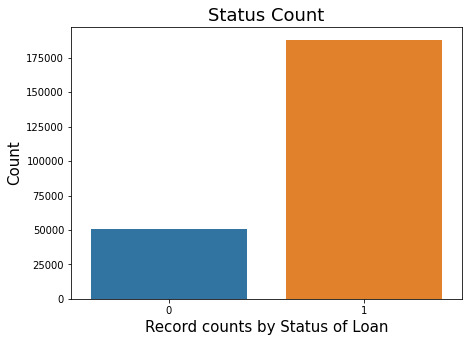

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(df['good_bad'])
plt.title("Status Count", fontsize=18)
plt.xlabel("Record counts by Status of Loan", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [ ]:
df_obj= df.select_dtypes(exclude = 'number')
df_num = df.select_dtypes(include = 'number')

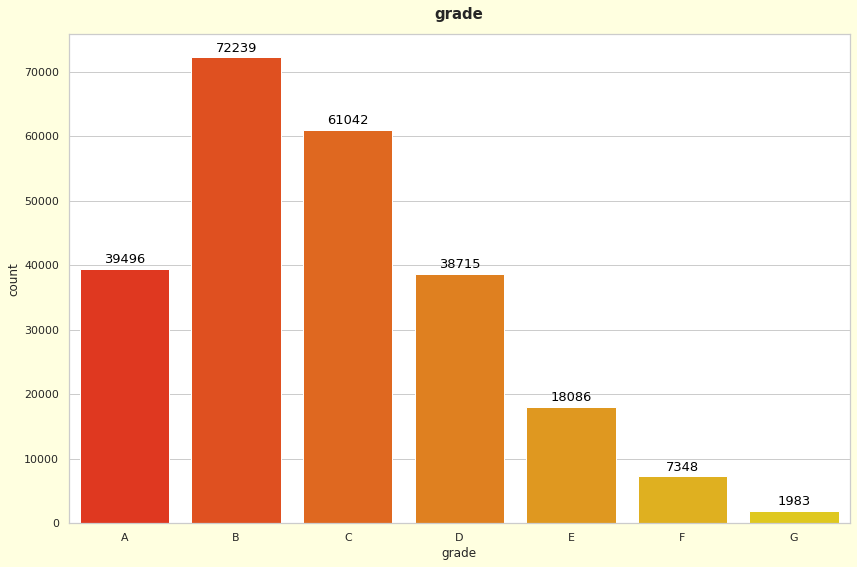

In [ ]:
plt.figure(figsize=(14,9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='grade', order=('A','B','C','D','E','F','G'), palette='autumn')
ax.set_title('grade', fontsize=15, fontweight='semibold', pad=15)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

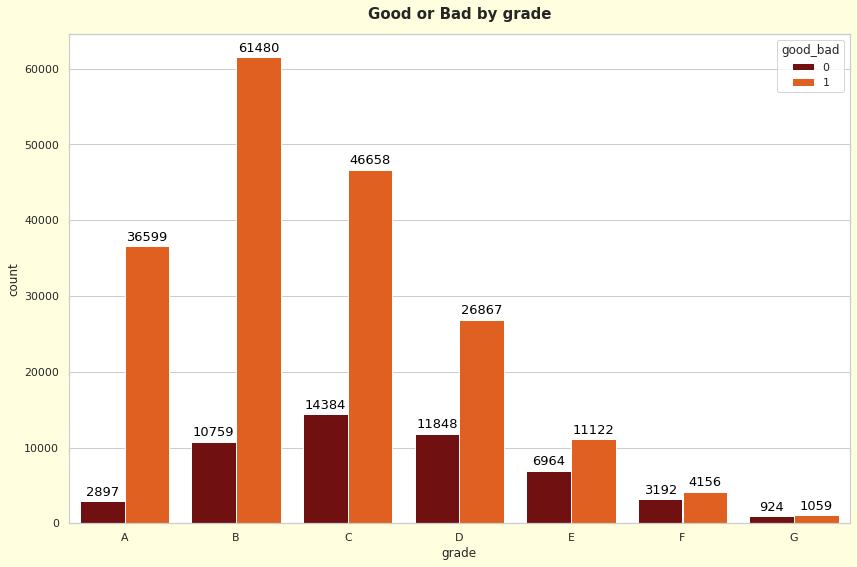

In [ ]:
plt.figure(figsize=(14,9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='grade', order=('A','B','C','D','E','F','G'), palette='gist_heat', hue='good_bad')
ax.set_title('Good or Bad by grade', fontsize=15, fontweight='semibold', pad=15)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

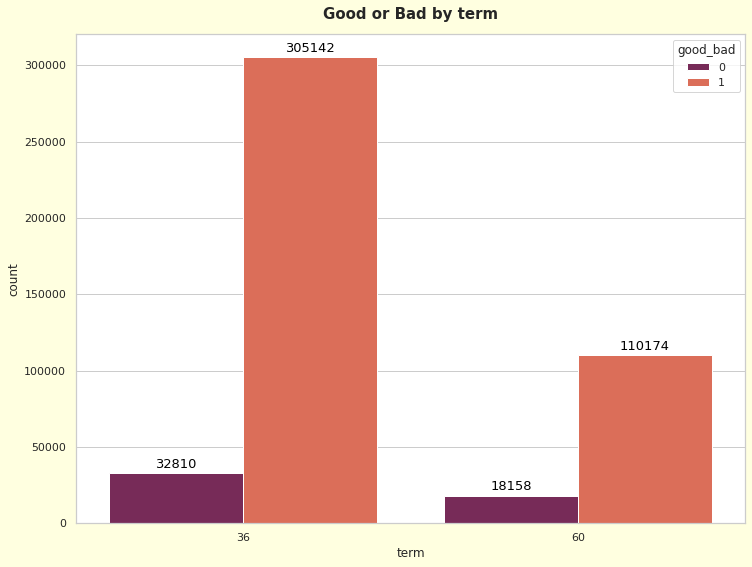

In [ ]:
plt.figure(figsize=(12,9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='term', order=df['term'].value_counts().index, palette='rocket', hue='good_bad')
ax.set_title('Good or Bad by term', fontsize=15, fontweight='semibold', pad=15)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

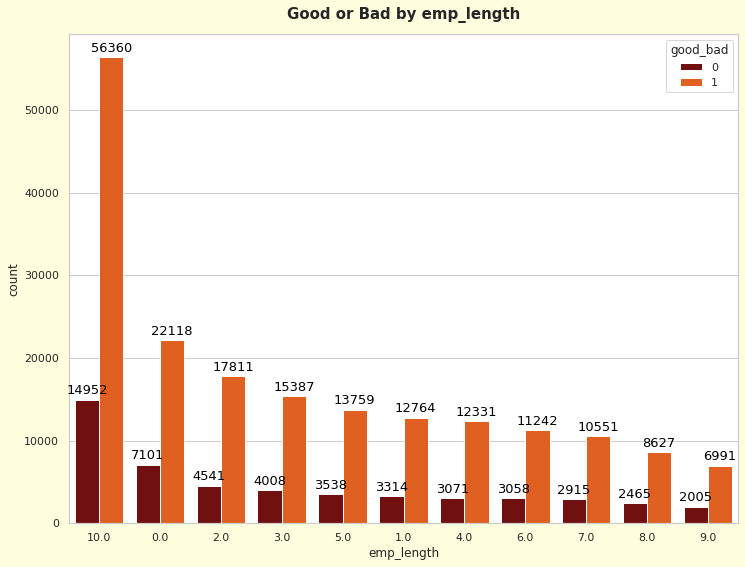

In [ ]:
plt.figure(figsize=(12,9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='emp_length', order=df['emp_length'].value_counts().index, palette='gist_heat', hue='good_bad')
ax.set_title('Good or Bad by emp_length', fontsize=15, fontweight='semibold', pad=15)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

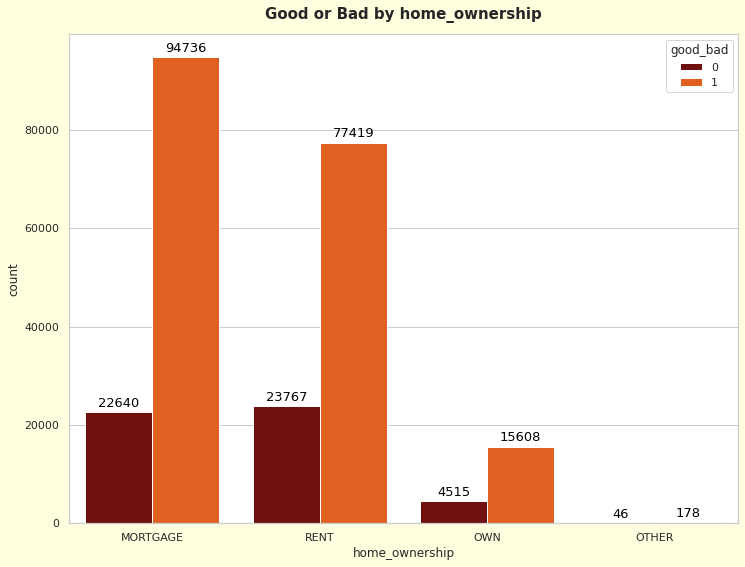

In [ ]:
plt.figure(figsize=(12,9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='home_ownership', order=df['home_ownership'].value_counts().index, palette='gist_heat', hue='good_bad')
ax.set_title('Good or Bad by home_ownership', fontsize=15, fontweight='semibold', pad=15)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

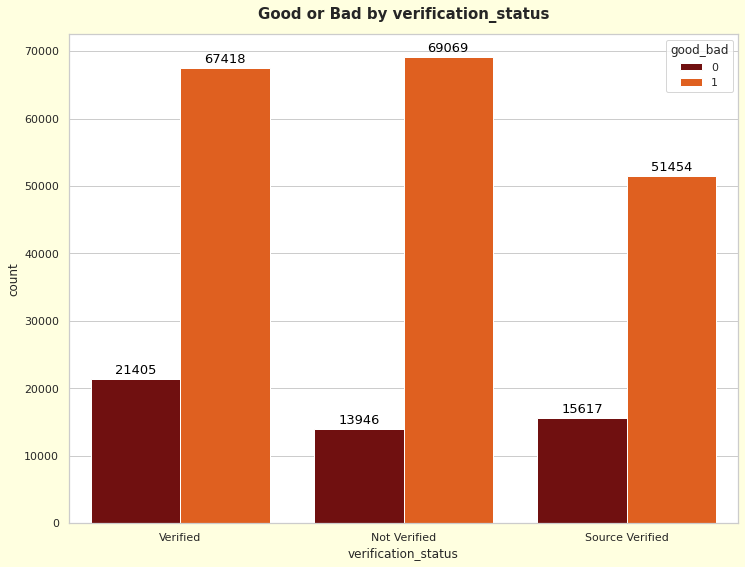

In [ ]:
plt.figure(figsize=(12,9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='verification_status', order=df['verification_status'].value_counts().index, palette='gist_heat', hue='good_bad')
ax.set_title('Good or Bad by verification_status', fontsize=15, fontweight='semibold', pad=15)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

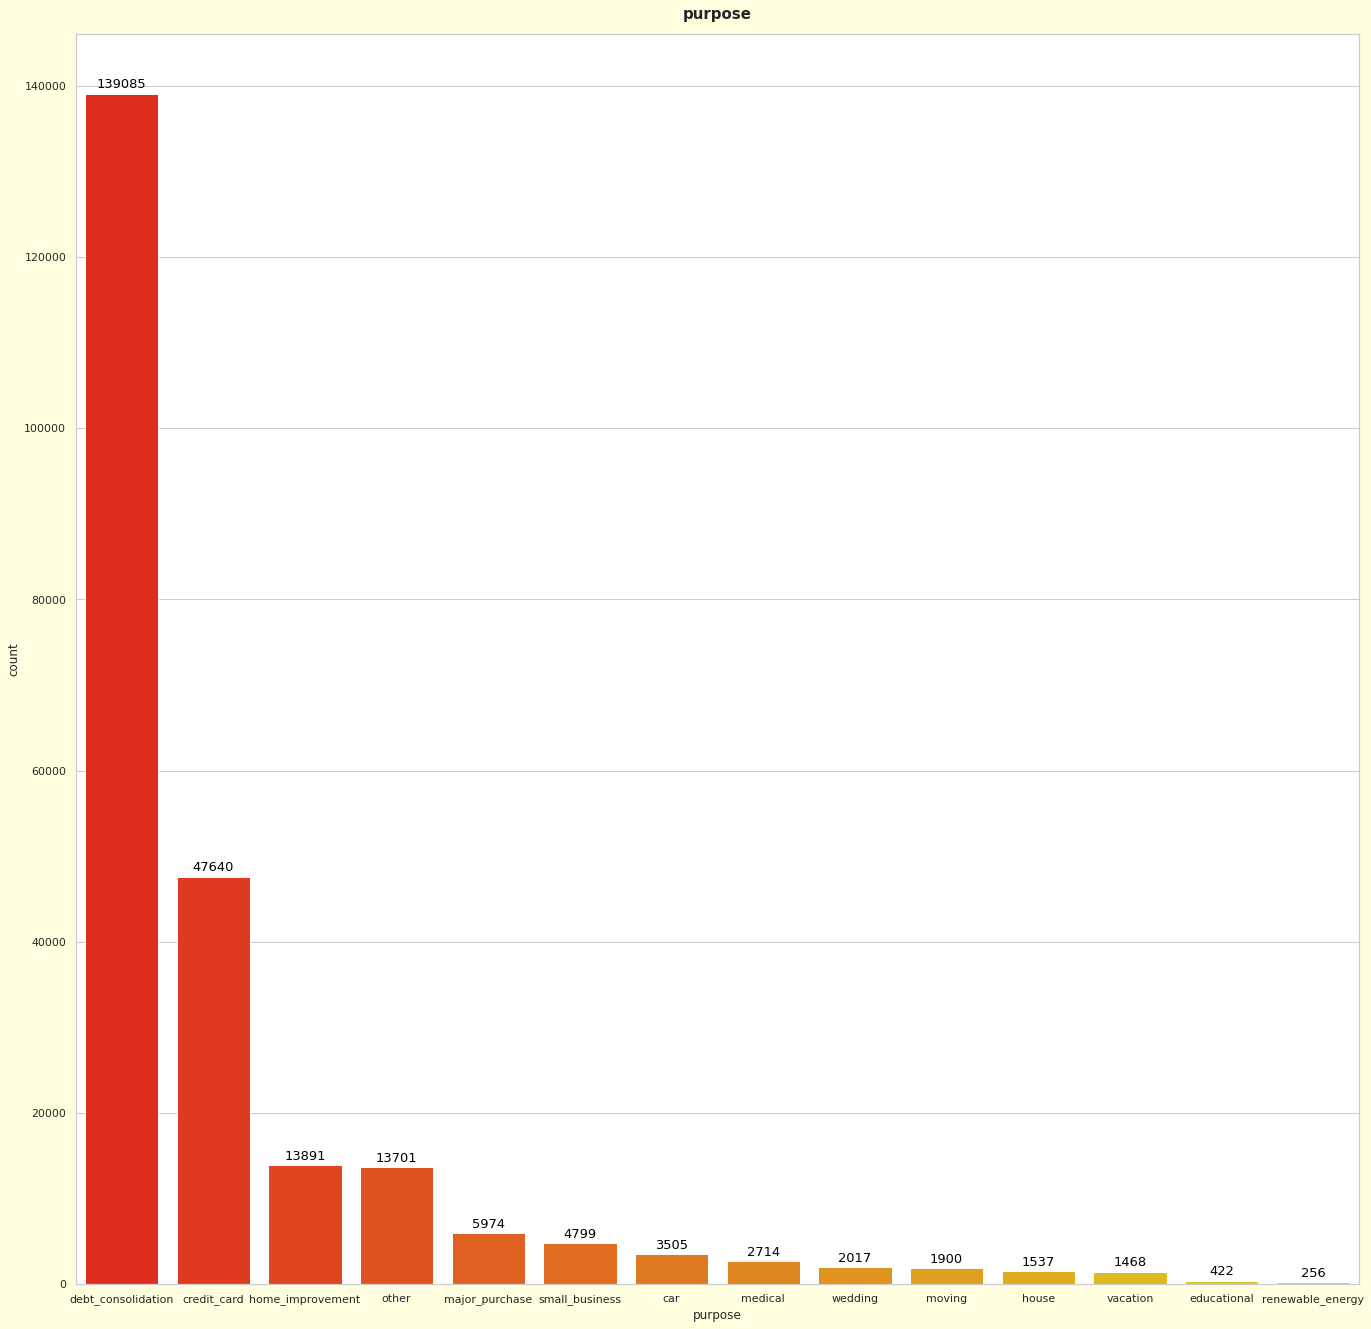

In [ ]:
plt.figure(figsize=(23,23), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='purpose', order=df['purpose'].value_counts().index, palette='autumn')
ax.set_title('purpose', fontsize=15, fontweight='semibold', pad=15)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

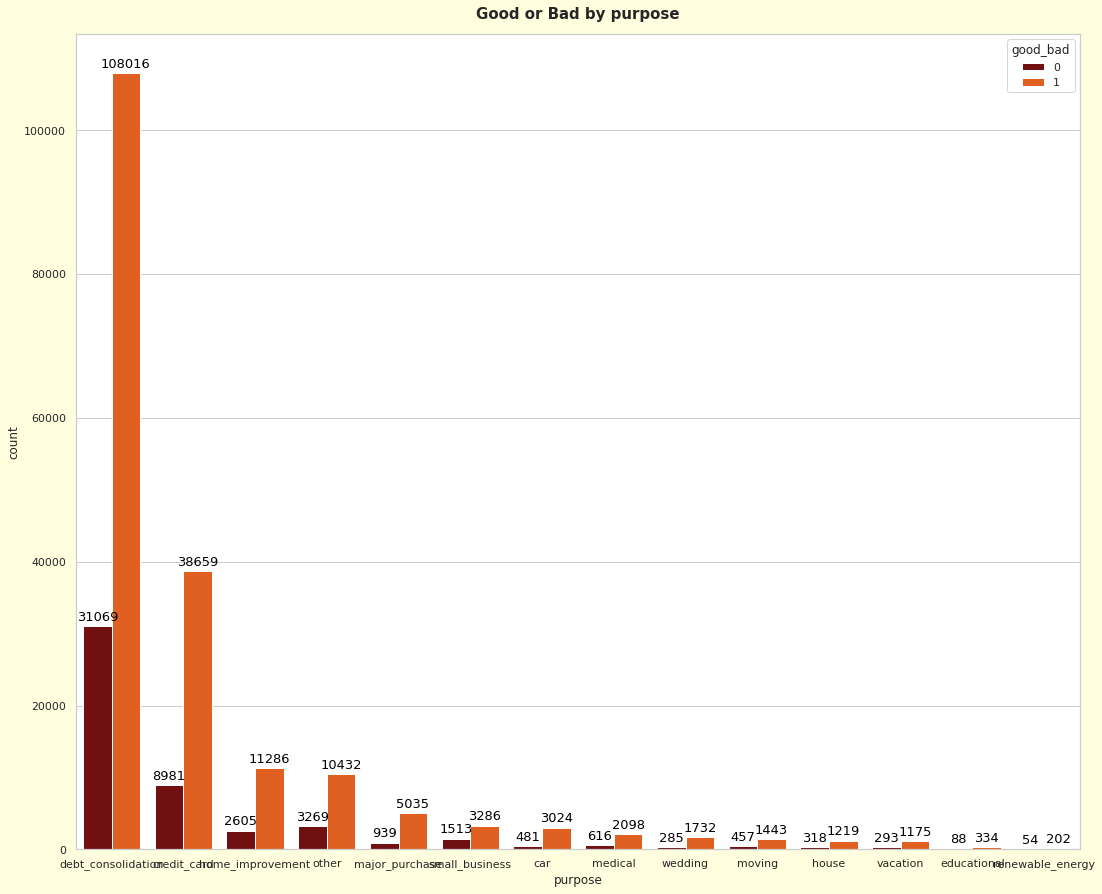

In [ ]:
plt.figure(figsize=(18,15), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='purpose', order=df['purpose'].value_counts().index, palette='gist_heat', hue='good_bad')
ax.set_title('Good or Bad by purpose', fontsize=15, fontweight='semibold', pad=15)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

Multivariat Analisis : <br>

1.grade : untuk grade A dan B, memiliki resiko paling kecil dalam tingkat tidak mengembalikan pinjaman, C dan D termasuk dalam
resiko sedang. dan E, F, dan G, tingkat resiko paling tinggi.<br>
2.term : para nasabah seperti yang terlihat lebih banyak memakai yang term 36 months dibanding yang 60 months. <br>
3.emp_length : para nasabah credit paling banyak berasal dari yang lama bekerjanya 5 -10 tahun. <br>
4.home_ownership : nasabah kredit paling banyak adalah nasabah dengan status mortgage/cicilan rumah, mungkin salah satu alasan meminjam kreditnya juga adalah untuk membayar cicilan rumah, setelah itu status  Rent disini mungkin salah satunya adalah untuk memenuhi kebutuhan sehari hari, OWN ini adalah status orang yang memiliki rumah sendiri, dan OTHER.<br>

5.verification_status : verified adalah status dimana orang tersebut datanya jelas dan sumber penghasilannya juga jelas. untuk source verified sepertinya untuk status orang yang datanya agak kurang jelas tapi sumber penghasilannya jelas, sedangkan not verified adalah untuk status yang mulai dari data pribadi sampai hasil penghasilannya juga tidak jelas.<br>

6.purpose : ini merupakan alasan kenapa mengambil pinjaman. terlihat dari graph, bahwa posisi teratas adalah untuk debt consolidation atau untuk penyelesaian utang. lalu di posisi setelahnya adalah credit card, ini mungkin untuk pembayaran kartu kredit, lalu ada home improvements ini asumsi saya dipakai untuk renovasi rumah , dll.<br>

Conclusion :
-menurut saya dari hasil pengamatan graph diatas. bila di summary semuanya, para nasabah rata - rata, memiliki masa kerja diatas 5 - 10 tahun, purpose pemakaian kredit untuk debt consolidation/penyelesaian utang, term paling disukai 36 months dibanding 60 months, lalu home_ownershipnya paling banyak adalah Mortgage atau rumah cicilan, grade rata - rata paling banyak A-B.

-dari sini saya bisa berkesimpulan untuk memberi saran kepada client untuk membuat sebuah program KPR(Kredit Cicilan Rumah),untuk skemanya bisa diatur oleh tim marketing. bila program KPR sudah ada, maka perlu dimaksimalkan kembali program tersebut. karna dari data terlihat jelas home_ownershipnya rata - rata mortgage, purposenya untuk debt consolidation salah satunya asumsi saya adalah untuk pembayaran cicilan rumah tadi. jadi dengan adanya program ini (bila belum ada) nasabah akan lebih tertarik juga untuk menggunakan term 60 months atau mungkin ada term yang lebih dari 60 months misal 120 months contohnya. karna untuk KPR yang saya pernah dapet info jarang sekali yang memakai short term seperti 36 months. untuk penawarannya mungkin bisa ke nasabah dengan grade A atau grade B, karna terlihat para nasabah dengan good loan rata - rata paling banyak antara grade A-B. bila sudah berhasil baru mungkin bisa ditawarkan ke nasabah lain dengan grade dibawah B seperti C, D, atau E.



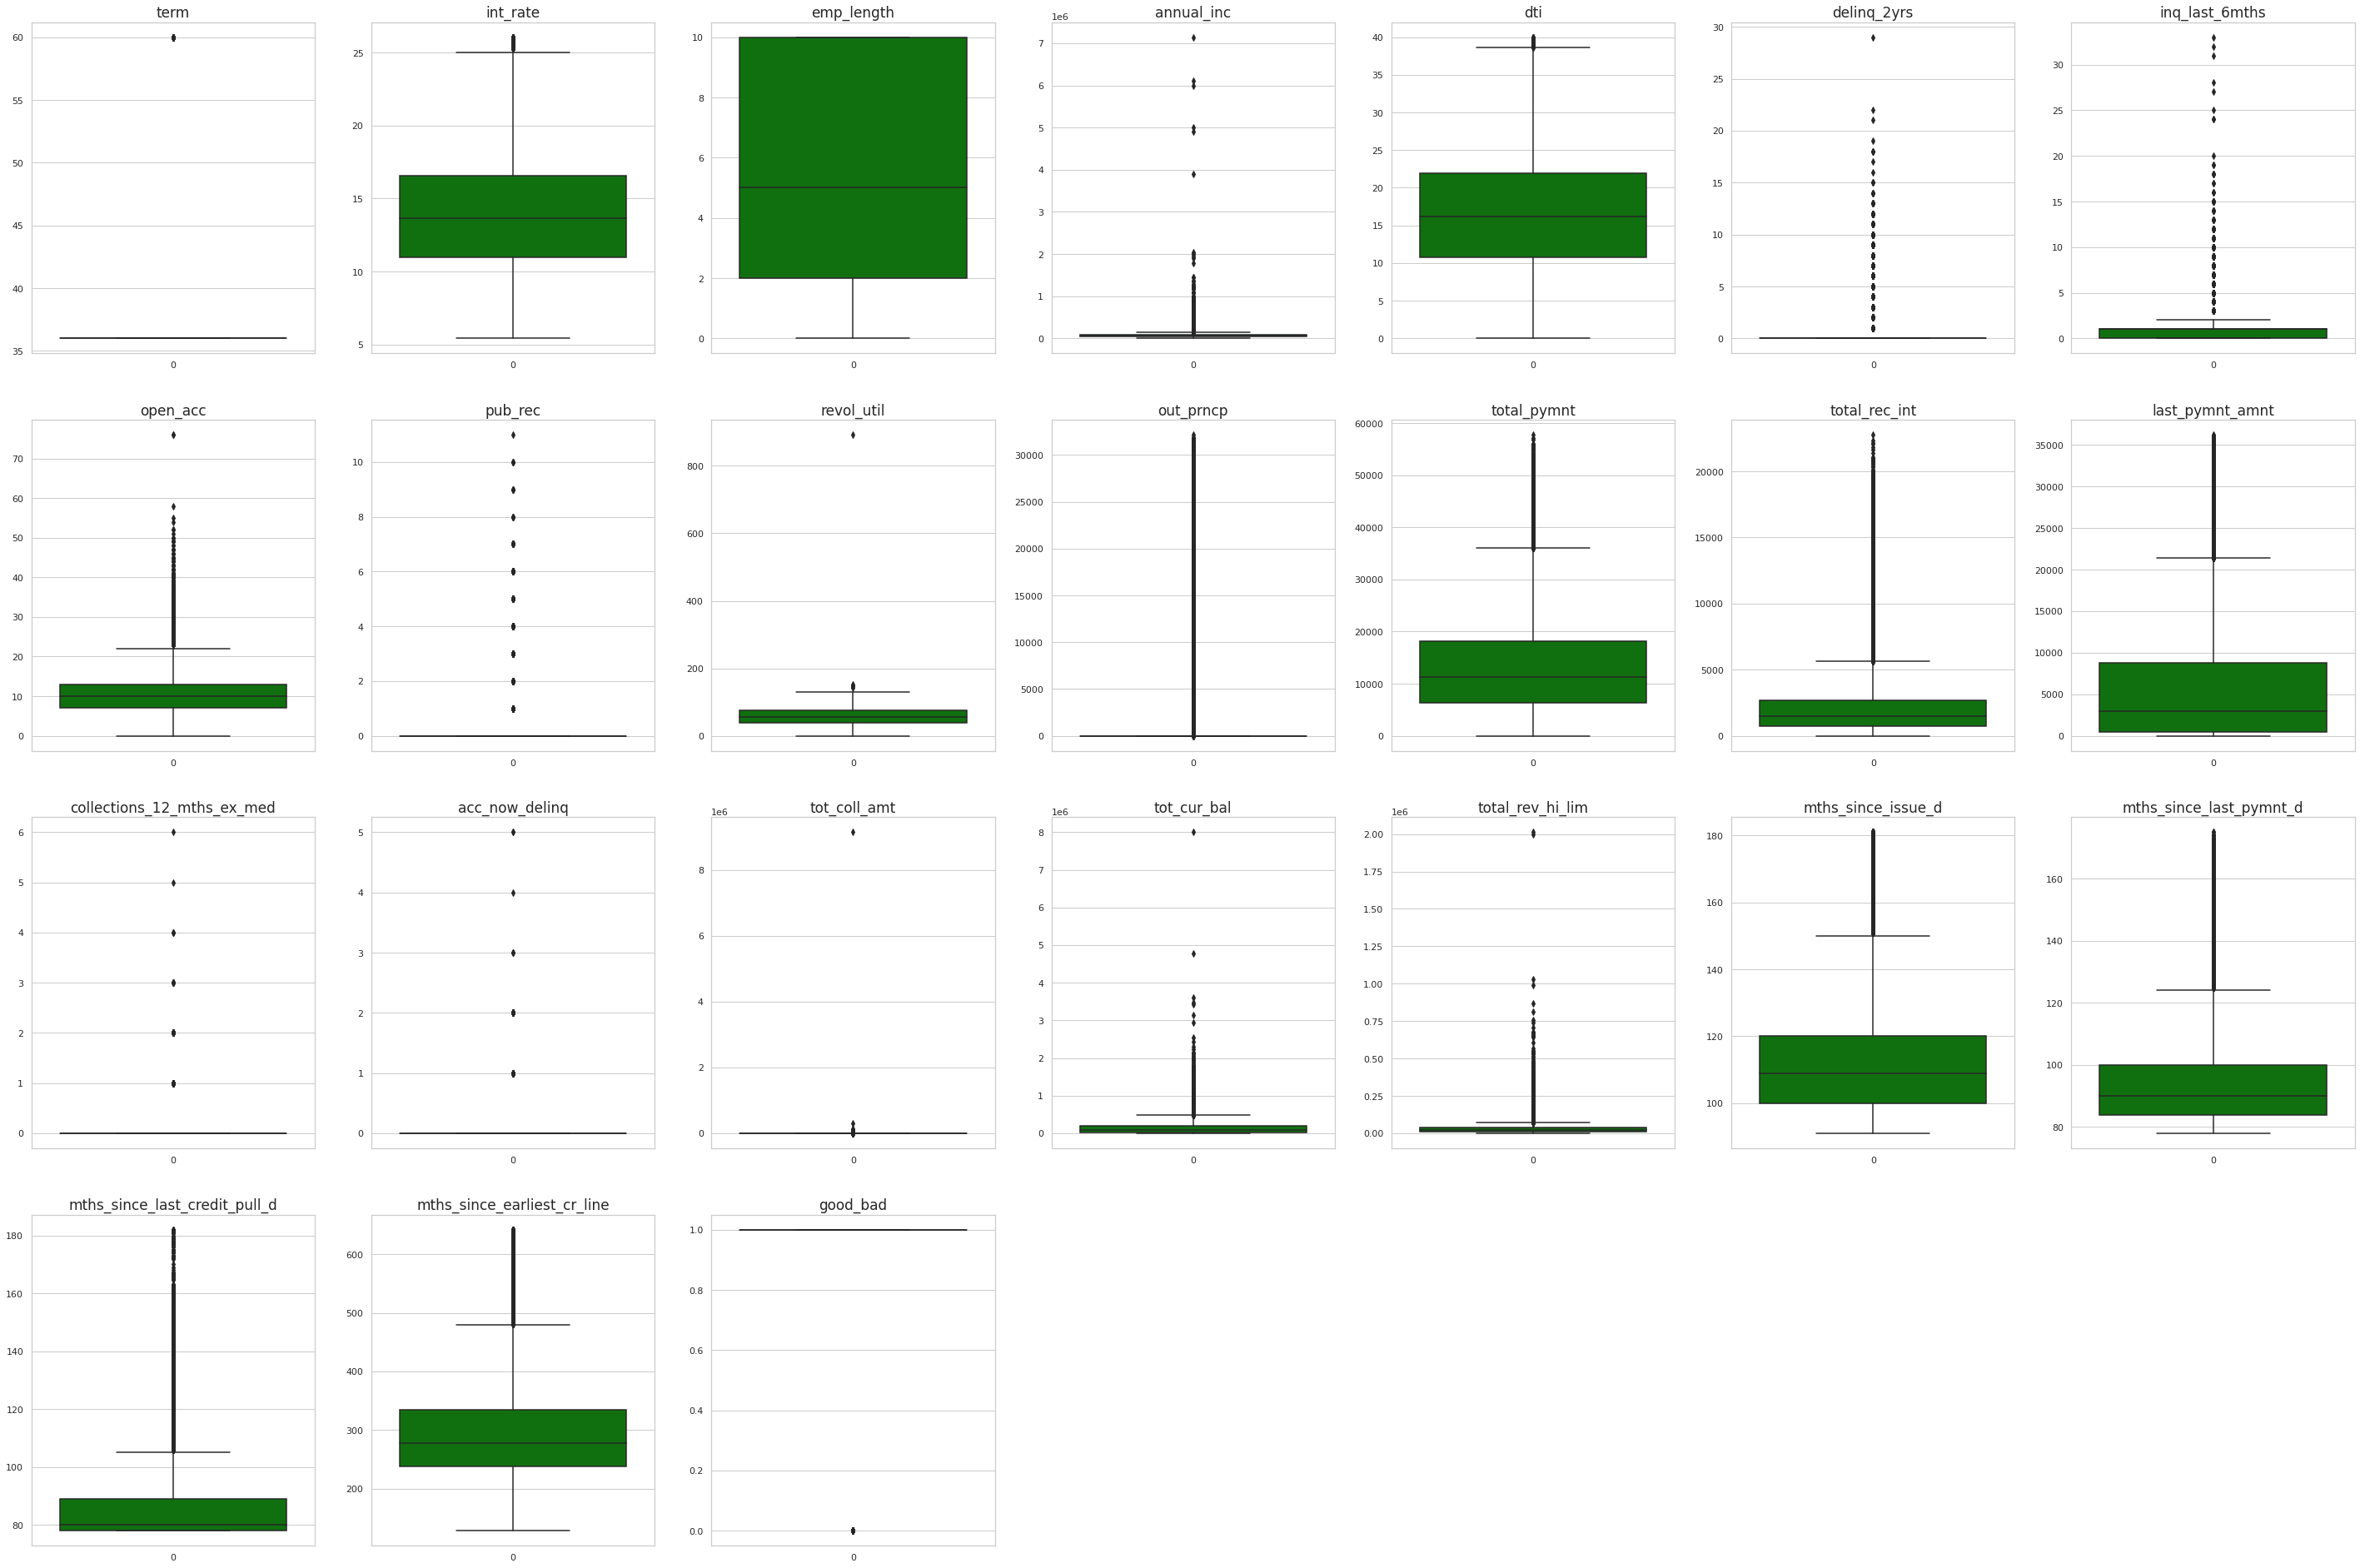

In [ ]:
cols = list(df_num.columns.values)

plt.figure(figsize=(50, 60))
for n, col in enumerate(cols):
  plt.subplot(7,7,n+1)
  sns.boxplot(data = df_num[col], color = 'green')
  plt.title(col, fontsize=17)
plt.show()

dari boxplot terlihat bahwa feature - feature numeric memiliki banyak sekali outlier. ini akan berpengaruh ke model nantinya, seperti misleading terhadap proses training yang menyebabkan waktu yang sangat lama untuk proses training, accuracy yang jelek, dan hasil dari modelnya juga jelek.

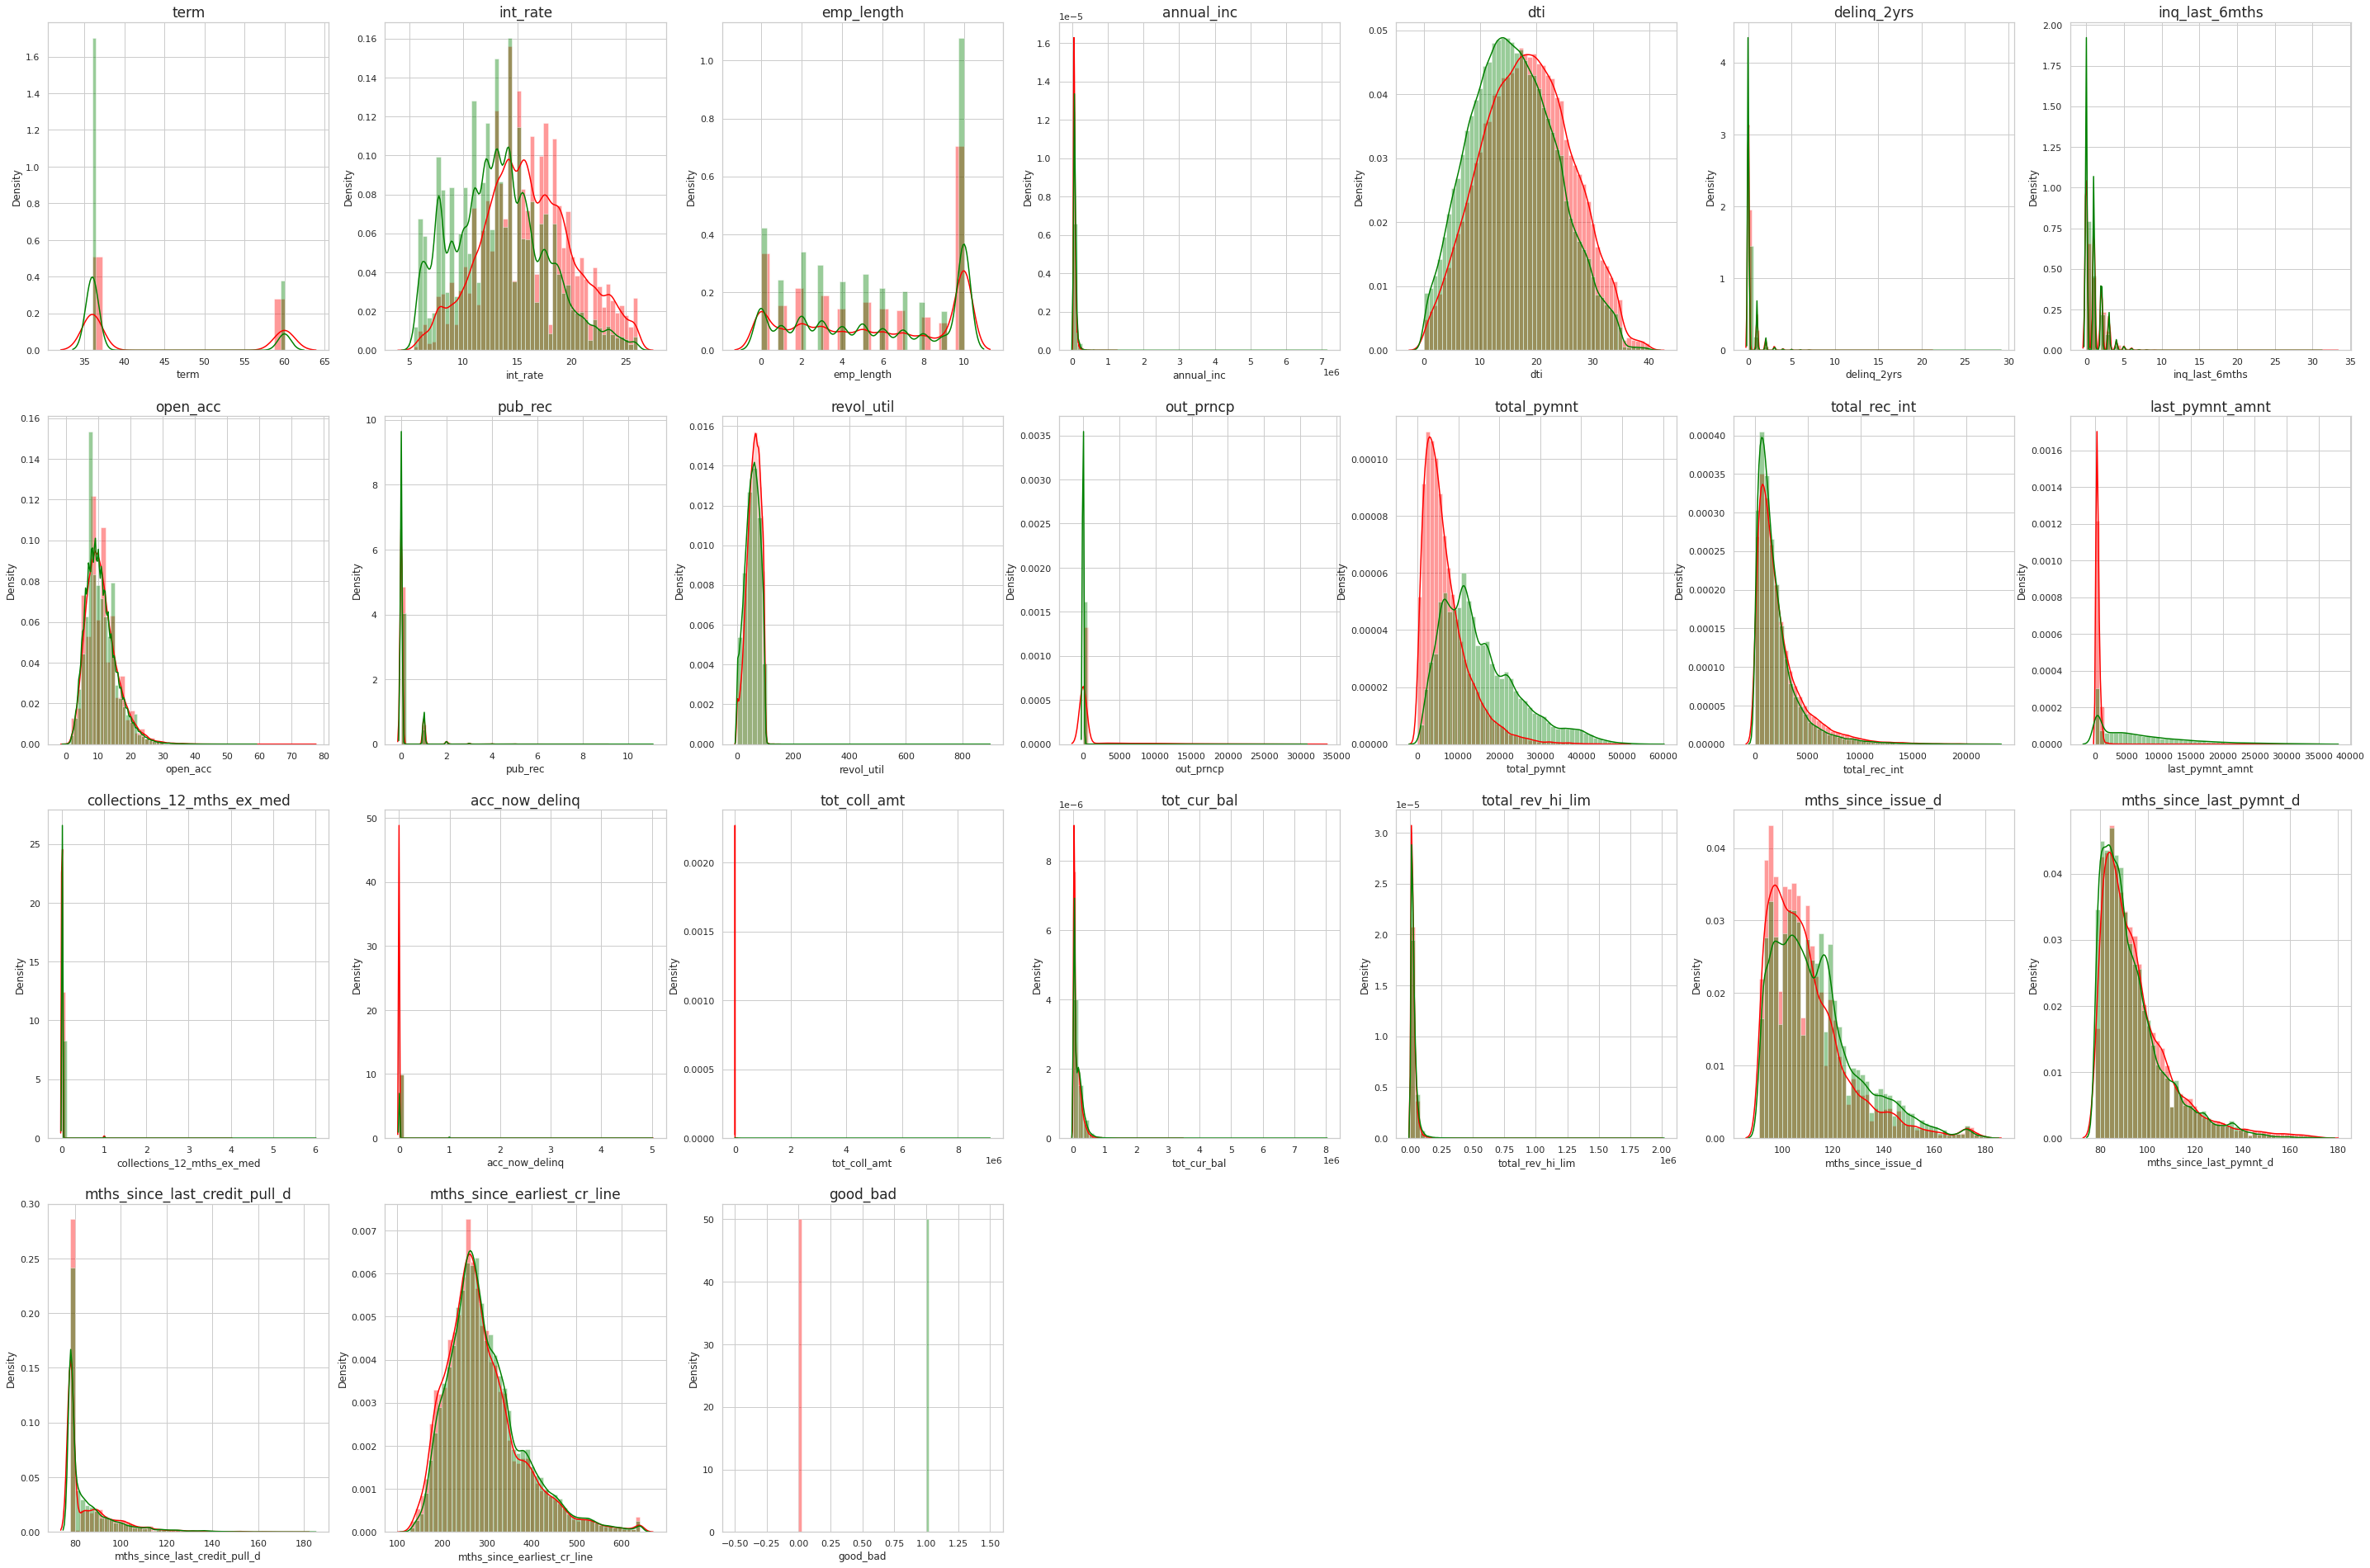

In [ ]:
bad_status = df.good_bad == 0
good_status = df.good_bad == 1

cols = list(df_num.columns.values)

plt.figure(figsize=(50, 60))
for n, col in enumerate(cols):
  plt.subplot(7,7,n+1)
  sns.distplot(df_num[col][bad_status], color='red')
  sns.distplot(df_num[col][good_status], color='green')
  plt.title(col, fontsize=17)
plt.show()

dari graph diatas, terlihat bahwa beberapa feature, datanya memiliki skew, jadi akan dilakukan beberapa transformasi untuk menanggani hal ini agar performa model bagus.

### <a name="p3">Splitting the data into train & test data</a>

In [ ]:
X = df.drop(['good_bad'], axis=1)
y = df['good_bad']

In [ ]:
X.shape, y.shape

((238909, 29), (238909,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((191127, 29), (47782, 29), (191127,), (47782,))

In [ ]:
X_train.isna().sum()/len(X_train)*100

term                              0.000000
int_rate                          0.000000
grade                             0.000000
emp_length                        0.000000
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
pymnt_plan                        0.000000
purpose                           0.000000
dti                               0.000000
delinq_2yrs                       0.011511
inq_last_6mths                    0.011511
open_acc                          0.011511
pub_rec                           0.011511
revol_util                        0.094178
initial_list_status               0.000000
out_prncp                         0.000000
total_pymnt                       0.000000
total_rec_int                     0.000000
last_pymnt_amnt                   0.000000
collections_12_mths_ex_med        0.062262
acc_now_delinq                    0.011511
tot_coll_amt                     27.846406
tot_cur_bal

## <a name="p3-1">Feature Engineering</a>

di tahap ini, saya melakukan beberapa transformasi seperti Imputation, Scalling, OneHotEncoder.<br>
1.Imputation, untuk handle missing value. ada beberapa data yang missing value nya diatas 5%, saya akan pakai KNN untuk sistem imputationnya. <br>
2.Scalling, untukk menormalisasi data yang yang skew tadi. saya pakai RobustScaller karna, scaller ini merupakan scaller yang paling robust terhadap data yang punya banyak outlier.<br>
3.OneHotEncoder untuk data dengan tipe objek dikonversikan ke bentuk integer. karna machine learning tidak mengenali bentuk data objjek.<br>

untuk mempersingkat code, saya gunakan pipeline untuk tiap tahapnya.

In [ ]:
def preprocessing(X_train,X_test):
    # Fitting to Train
    cat_kolom = X_train.select_dtypes(exclude=np.number).columns
    num_kolom = X_train.select_dtypes(include=np.number).columns

    num_pre_label = Pipeline([("knnimputer",KNNImputer(n_neighbors=5)),
                              ("scaler",RobustScaler())])
    cat_pre_label = Pipeline([("ordinallabel", OrdinalEncoder())])

    preprocess = ColumnTransformer([("num_pipe", num_pre_label, num_kolom),
                                    ("cat_pipe", cat_pre_label, cat_kolom)])

    cat_pre_label.fit(X_train[cat_kolom])

    preprocess_impute = Pipeline([("prepros", preprocess),
                                  ("simpleimputer", SimpleImputer(strategy='most_frequent'))])


    # Transform Train
    df_train = pd.DataFrame(preprocess_impute.fit_transform(X_train))
    df_train.columns = list(num_kolom) + list(cat_kolom)

    if len(cat_kolom) != 0:
        df_train[cat_kolom] = cat_pre_label.inverse_transform(df_train[cat_kolom])
        n   = len(cat_kolom)
        ohe = OneHotEncoder(handle_unknown='ignore')
        ohe.fit(df_train[cat_kolom])
        obj = pd.DataFrame(ohe.transform(df_train[cat_kolom]).toarray(),columns=ohe.get_feature_names(cat_kolom))

        df_train = pd.concat([df_train[num_kolom],obj],axis=1)

    # Transform Test
    df_test = pd.DataFrame(preprocess_impute.transform(X_test))
    df_test.columns = list(num_kolom) + list(cat_kolom)

    if len(cat_kolom) != 0:
        df_test[cat_kolom] = cat_pre_label.inverse_transform(df_test[cat_kolom])
        obj = pd.DataFrame(ohe.transform(df_test[cat_kolom]).toarray(),columns=ohe.get_feature_names(cat_kolom))
        df_test = pd.concat([df_test[num_kolom],obj],axis=1)

    return df_train,df_test,preprocess_impute

In [ ]:
X_train_clean,X_test_clean, pre = preprocessing(X_train,X_test)

In [ ]:
missing = X_train_clean.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

In [ ]:
X_train_clean.head()

,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,0.0,-1.258929,-0.625,0.485756,-0.028648,0.0,-1.0,0.166667,0.0,-0.661290,0.0,-0.688410,-0.482421,-0.275131,0.0,0.0,0.0,0.898429,1.070814,-0.35,0.4375,-0.181818,0.360825,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,-1.364286,0.625,2.936585,-0.708147,0.0,-1.0,1.666667,0.0,-0.793011,0.0,1.076428,-0.033228,1.363512,0.0,0.0,0.0,0.104879,3.546826,-0.50,-0.3750,0.363636,1.742268,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.032143,-0.500,-0.234146,-0.927484,0.0,1.0,-0.833333,0.0,-0.784946,0.0,0.294705,0.644167,-0.297084,0.0,0.0,30.8,-0.084358,-0.054835,1.85,1.1875,2.727273,0.092784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.057143,0.625,0.741463,-0.849597,0.0,-1.0,0.166667,0.0,0.811828,0.0,-0.775706,-0.428391,-0.307936,0.0,0.0,0.0,-0.448168,-0.130420,-0.65,0.0000,-0.181818,-0.432990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.357143,-0.625,-0.965854,0.146822,2.0,-1.0,0.666667,0.0,-0.513441,0.0,-0.015872,-0.151959,-0.345602,1.0,0.0,0.0,-0.483207,0.462843,-0.70,-0.7500,-0.181818,0.855670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## <a name="p3-2">Feature Selection</a>

di tahap ini, saya akan menyeleksi beberapa fitur saja. jadi tidak semua fitur terpakai. hanya fitur - fitur yang pnya korelasi kuat saja yang akan saya pakai.

untuk feature selectionnya saya menggunakan sistem voting. jadi feature - feature ini nantinya akan dipilih berdasarkan voting tiap - tiap feature selection yang ada nantinya. ada beberap selection yang saya pakai:<br>
1.WOE-IV<br>
2.Kbest-Chisquare<br>
3.RandomForest<br>
4.SVC<br>
5.Extratress<br>
6.RFE (recursive feature elimination).<br>

In [ ]:
features = X_train_clean.copy()
label = y_train.copy()

In [ ]:
from xverse.transformer import WOE
from xverse.ensemble import VotingSelector
clf = WOE()

In [ ]:
clf.fit(features,label)

WOE(mono_custom_binning={'acc_now_delinq': array([0., 1., 5.]),
                         'annual_inc': array([ -1.45619512,  -0.28292683,   0.35121951, 147.27804878]),
                         'collections_12_mths_ex_med': array([0., 1., 5.]),
                         'delinq_2yrs': array([ 0.,  1., 29.]),
                         'dti': array([-1.44583706, -0.31602507,  0.32855864,  2.13428827]),
                         'emp_length': array([-0.625, -0.25 ,  0.5  ,  0.625]),
                         'grade_A': array([0., 1.]), 'grade_B'...
                           Interval(0.333, 11.0, closed='right'): -0.00402069509514586},
              'out_prncp': {Interval(-0.001, 1.0, closed='right'): -0.0004470708404461248,
                            Interval(1.0, 32160.38, closed='right'): 0.011366861094628049},
              'pub_rec': {Interval(-0.001, 1.0, closed='right'): -0.0010980748574424318,
                          Interval(1.0, 11.0, closed='right'): 0.08630414713231331},
       

In [ ]:
IV = clf.iv_df
IV = IV.rename(columns={'Variable_Name':'index','Information_Value':'IV'})
IV

,index,IV
34,purpose_house,4.697841e-04
51,total_rev_hi_lim,3.188277e-04
22,mths_since_earliest_cr_line,3.018350e-04
50,total_rec_int,2.421556e-04
46,term,2.253856e-04
23,mths_since_issue_d,1.978489e-04
47,tot_coll_amt,1.870492e-04
1,annual_inc,1.866110e-04
12,grade_G,1.766910e-04
4,dti,1.612397e-04


In [ ]:
clf = RandomForestClassifier()

clf.fit(features,label)

preds = clf.predict(features)

accuracy_score(label,preds)

1.0

In [ ]:
VI = pd.DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
13,last_pymnt_amnt,0.332176
11,total_pymnt,0.166148
19,mths_since_issue_d,0.072909
12,total_rec_int,0.063954
20,mths_since_last_pymnt_d,0.056304
10,out_prncp,0.049216
1,int_rate,0.037255
0,term,0.024353
21,mths_since_last_credit_pull_d,0.018427
4,dti,0.016932


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, label)

ExtraTreesClassifier()

In [ ]:

FI = pd.DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
13,last_pymnt_amnt,0.262103
11,total_pymnt,0.148615
10,out_prncp,0.053477
12,total_rec_int,0.049338
20,mths_since_last_pymnt_d,0.045222
19,mths_since_issue_d,0.044790
1,int_rate,0.036412
0,term,0.032027
21,mths_since_last_credit_pull_d,0.024565
4,dti,0.021919


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, label)
model = SelectFromModel(lsvc,prefit=True)

In [ ]:
l1 = pd.DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()
l1[l1['L1'] == True]

,index,L1
0,term,True
1,int_rate,True
2,emp_length,True
3,annual_inc,True
4,dti,True
6,inq_last_6mths,True
7,open_acc,True
8,pub_rec,True
9,revol_util,True
10,out_prncp,True


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model,n_features_to_select=30)
fit = rfe.fit(features, label)

In [ ]:
Selected = pd.DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()
Selected[Selected['RFE'] == True]

,index,RFE
11,total_pymnt,True
12,total_rec_int,True
13,last_pymnt_amnt,True
14,collections_12_mths_ex_med,True
19,mths_since_issue_d,True
20,mths_since_last_pymnt_d,True
23,grade_A,True
24,grade_B,True
25,grade_C,True
27,grade_E,True


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=30)
fit = model.fit(features.abs(), label)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
chi_sq = pd.DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)
chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
10,out_prncp,183469798.19
16,tot_coll_amt,565603.39
0,term,109565.73
13,last_pymnt_amnt,7615.52
23,grade_A,3673.69
27,grade_E,2565.20
28,grade_F,1787.84
26,grade_D,1634.10
24,grade_B,1454.58
34,verification_status_Not Verified,867.10


In [ ]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [ ]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)

score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)
score_table['final_score'] = score_table.sum(axis=1)
score_table.sort_values('final_score',ascending=0).head(30)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
23,last_pymnt_amnt,0,1,1,1,1,1,5
3,total_rec_int,1,1,1,0,1,1,5
41,mths_since_last_pymnt_d,0,1,1,0,1,1,4
21,total_pymnt,0,1,1,0,1,1,4
4,term,1,0,0,1,0,1,3
5,mths_since_issue_d,0,1,0,0,1,1,3
42,out_prncp,0,0,1,1,0,1,3
11,grade_A,0,0,0,1,1,1,3
32,verification_status_Not Verified,0,0,0,0,1,1,2
26,home_ownership_RENT,0,0,0,0,1,1,2


setelah selesai selection kita masukan ke dataframe feature - feature tadi, dan kita pilih berdasarkan votingnya. sebelum pemilihan feature akhir, yang akan kita pakai ada satu selection lagi yang saya pakai yaitu variance_inflation_factor, ini dipakai karna feature kita tadi banyak sekali outlier dan juga berfungsi untuk menanggani multikolinearitas, jadi feature - feature yang tidak sesuai akan di remove berdasarkan hasil voting dan hasil dari variance_inflation_factor.    

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    return(vif)

In [ ]:
features = features[list(score_table[score_table['final_score'] >= 2]['index'])]
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [ ]:
final_vars = list(vif['Features'])
final_vars

['purpose_house',
 'total_rev_hi_lim',
 'mths_since_earliest_cr_line',
 'total_rec_int',
 'term',
 'mths_since_issue_d',
 'grade_G',
 'grade_A',
 'verification_status_Source Verified',
 'grade_E',
 'grade_B',
 'initial_list_status_w',
 'total_pymnt',
 'purpose_credit_card',
 'last_pymnt_amnt',
 'home_ownership_RENT',
 'purpose_car',
 'grade_F',
 'purpose_debt_consolidation',
 'verification_status_Not Verified',
 'purpose_major_purchase',
 'mths_since_last_pymnt_d',
 'out_prncp',
 'purpose_vacation',
 'grade_C',
 'purpose_small_business']

In [ ]:
X_train_final = X_train_clean[final_vars]
X_test_final  = X_test_clean[final_vars]

In [ ]:
X_train_final.head()

,purpose_house,total_rev_hi_lim,mths_since_earliest_cr_line,total_rec_int,term,mths_since_issue_d,grade_G,grade_A,verification_status_Source Verified,grade_E,grade_B,initial_list_status_w,total_pymnt,purpose_credit_card,last_pymnt_amnt,home_ownership_RENT,purpose_car,grade_F,purpose_debt_consolidation,verification_status_Not Verified,purpose_major_purchase,mths_since_last_pymnt_d,out_prncp,purpose_vacation,grade_C,purpose_small_business
0,0.00,1.07,0.36,-0.48,0.00,-0.35,0.00,1.00,0.00,0.00,0.00,0.00,-0.69,0.00,-0.28,0.00,0.00,0.00,1.00,0.00,0.00,0.44,0.00,0.00,0.00,0.00
1,0.00,3.55,1.74,-0.03,0.00,-0.50,0.00,1.00,0.00,0.00,0.00,1.00,1.08,1.00,1.36,0.00,0.00,0.00,0.00,0.00,0.00,-0.38,0.00,0.00,0.00,0.00
2,0.00,-0.05,0.09,0.64,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,-0.30,0.00,0.00,0.00,0.00,1.00,0.00,1.19,0.00,0.00,1.00,0.00
3,0.00,-0.13,-0.43,-0.43,0.00,-0.65,0.00,0.00,0.00,0.00,0.00,0.00,-0.78,0.00,-0.31,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.46,0.86,-0.15,0.00,-0.70,0.00,0.00,0.00,0.00,1.00,0.00,-0.02,0.00,-0.35,0.00,0.00,0.00,1.00,0.00,0.00,-0.75,0.00,0.00,0.00,0.00


In [ ]:
X_test_final.head()

,purpose_house,total_rev_hi_lim,mths_since_earliest_cr_line,total_rec_int,term,mths_since_issue_d,grade_G,grade_A,verification_status_Source Verified,grade_E,grade_B,initial_list_status_w,total_pymnt,purpose_credit_card,last_pymnt_amnt,home_ownership_RENT,purpose_car,grade_F,purpose_debt_consolidation,verification_status_Not Verified,purpose_major_purchase,mths_since_last_pymnt_d,out_prncp,purpose_vacation,grade_C,purpose_small_business
0,0.00,-0.72,-0.10,-0.58,0.00,-0.65,0.00,0.00,0.00,0.00,1.00,1.00,-0.84,0.00,-0.33,1.00,0.00,0.00,1.00,1.00,0.00,-0.38,0.00,0.00,0.00,0.00
1,0.00,-0.81,-0.58,3.21,24.00,0.45,0.00,0.00,0.00,1.00,0.00,0.00,0.41,0.00,-0.34,0.00,0.00,0.00,1.00,0.00,0.00,0.62,0.00,0.00,0.00,0.00
2,0.00,0.35,0.85,0.13,24.00,-0.55,0.00,0.00,1.00,0.00,0.00,1.00,0.21,0.00,0.86,0.00,0.00,0.00,1.00,0.00,0.00,-0.38,0.00,0.00,1.00,0.00
3,0.00,-0.89,-0.87,-0.60,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,-0.50,0.00,0.22,1.00,0.00,0.00,1.00,1.00,0.00,1.44,0.00,0.00,0.00,0.00
4,0.00,0.19,-0.64,-0.59,0.00,-0.50,0.00,1.00,0.00,0.00,0.00,0.00,-0.49,0.00,0.04,0.00,0.00,0.00,0.00,1.00,0.00,-0.38,0.00,0.00,0.00,0.00


## <a name="p4">Model Building</a>

#### hasil dari X_train_final yang sudah diolah tadi akan dimasukan ke model. disini saya membuat beberapa model sekaligus untuk melihat performansi model mana yang paling bagus.
1.Logistic Regression dengan penalty L1 dan L2<br>
2.Decisin Tree<br>
3.Random Forest<br>
4.XGBoost<br>
5.MLP (Multi Layer Perceptron)<br>


In [ ]:
#dataframe untuk menyimpan hasil dari model yang sudah dibuat
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [ ]:
# fungsi untuk membuat plot confusion matrix setiap model
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Good_Recom','Bad_Recom']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]

  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
## fungsi untuk fit dan prediction model logistic regression dengan penalty L1 dan L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train_final,y_train, X_test_final, y_test ):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

  searchCV_l1.fit(X_train_final, y_train)
  searchCV_l2.fit(X_train_final, y_train)
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)


  #mencari predicted vallues
  y_pred_l1 = searchCV_l1.predict(X_test_final)
  y_pred_l2 = searchCV_l2.predict(X_test_final)


  #mencari predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test_final)[:,1]
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test_final)[:,1]

  # Accuracy models L2/L1
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)

  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  print("classification Report")
  print(classification_report(y_test, y_pred_l2>threshold))

  print("classification Report")
  print(classification_report(y_test, y_pred_l1>threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [ ]:
# fungsi untuk fit dan prediction model Decision Tree untuk 2 kriteria yaitu gini and entropy
def buildAndRunTreeModels(df_Results, Methodology, X_train_final,y_train, X_test_final, y_test ):
  #Evaluaasi Decision Tree model dengan 'gini' & 'entropy'
  criteria = ['gini', 'entropy']
  scores = {}

  for c in criteria:
      dt = DecisionTreeClassifier(criterion = c, random_state=42)
      dt.fit(X_train_final, y_train)
      y_pred = dt.predict(X_test_final)
      test_score = dt.score(X_test_final, y_test)
      tree_preds = dt.predict_proba(X_test_final)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)

      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))


      print("classification Report")
      print(classification_report(y_test, y_pred>threshold))

      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()

      df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
# fungsi untuk fit dan prediction model Random Forest
def buildAndRunRandomForestModels(df_Results, Methodology, X_train_final,y_train, X_test_final, y_test ):
  #Evaluate Random Forest model

  #  membuat model dengan 100 trees
  RF_model = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit ke training data
  RF_model.fit(X_train_final, y_train)
  RF_test_score = RF_model.score(X_test_final, y_test)
  RF_model.predict(X_test_final)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Prediksi Actual class
  rf_predictions = RF_model.predict(X_test_final)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)


  # Probabilitas untuk tiap class
  rf_probs = RF_model.predict_proba(X_test_final)[:, 1]

  # kalkulasi roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))

  print("classification Report")
  print(classification_report(y_test, rf_predictions>threshold))


  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
# fungsi untuk fit dan prediction model XGBoost
def buildAndRunXGBoostModels(df_Results, Methodology,X_train_final,y_train, X_test_final, y_test ):
  #Evaluasi XGboost model
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train_final, y_train)
  y_pred = XGBmodel.predict(X_test_final)

  XGB_test_score = XGBmodel.score(X_test_final, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)

  # Probabilitas untuk setiap class
  XGB_probs = XGBmodel.predict_proba(X_test_final)[:, 1]

  # kalkulasi roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))

  print("classification Report")
  print(classification_report(y_test, y_pred>threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9885927249936355
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

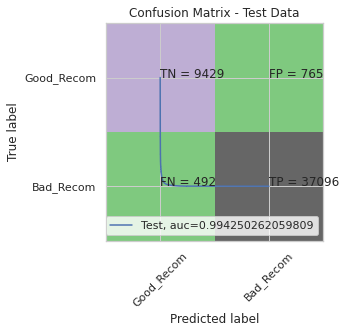

In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Default Cross Validation", X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Default Cross Validation",X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Default Cross Validation",X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Default Cross Validation",X_train_final,y_train, X_test_final, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# cek hasil dari df_result yang berisikan hasil dari semua model yang sudah dijalankan.
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,Default Cross Validation,Logistic Regression with L2 Regularisation,0.96,0.99,0.81
1,Default Cross Validation,Logistic Regression with L1 Regularisation,0.21,0.50,1.50
2,Default Cross Validation,Tree Model with gini criteria,0.98,0.96,1.00
3,Default Cross Validation,Tree Model with entropy criteria,0.98,0.97,1.00
4,Default Cross Validation,Random Forest,0.98,1.00,0.68
5,Default Cross Validation,XGBoost,0.97,0.99,0.71


#### dari ke Tree model dan Logistic Regression diatas saya coba ambil model LogisticRegression, Random Forest, XGBoost untuk melihat performansinya, karna classification report diatas adalah data testnya untuk sedangkan data trainingnya tidak saya sertakan. jadi saya ambil model yang test nya paling bagus dan ingin lihat apakah model diatas Overfitting atau tidak.

In [ ]:
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

Model Accuracy: 0.9823364446862836
Confusion Matrix
Random Forest train roc_value: 1.0
Random Forest threshold: 0.56
Random Forest test roc_value: 0.9970836183488864
Random Forest threshold: 0.68
classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40774
           1       1.00      1.00      1.00    150353

    accuracy                           1.00    191127
   macro avg       1.00      1.00      1.00    191127
weighted avg       1.00      1.00      1.00    191127

classification Report Test
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     10194
           1       0.98      0.99      0.99     37588

    accuracy                           0.98     47782
   macro avg       0.98      0.97      0.97     47782
weighted avg       0.98      0.98      0.98     47782

ROC for the train dataset 100.0%
ROC for the test dataset 99.7%


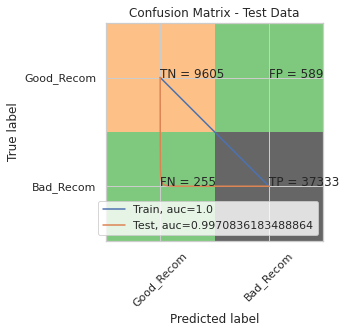

In [ ]:

RF_tun = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit ke training data
RF_tun.fit(X_train_final,y_train)
RF_test_score = RF_tun.score(X_test_final, y_test)
RF_tun.predict(X_test_final)

print('Model Accuracy: {0}'.format(RF_test_score))


  # Prediksi Actual class
rf_predictions_train = RF_tun.predict(X_train_final)
rf_predictions_test = RF_tun.predict(X_test_final)

print("Confusion Matrix")
Plot_confusion_matrix(y_train, rf_predictions_train)
Plot_confusion_matrix(y_test, rf_predictions_test)


  # Probabilitas untuk tiap class
rf_probs_train = RF_tun.predict_proba(X_train_final)[:, 1]
rf_probs_test = RF_tun.predict_proba(X_test_final)[:, 1]

  # kalkulasi roc auc
roc_value_train = roc_auc_score(y_train, rf_probs_train)
roc_value_test = roc_auc_score(y_test, rf_probs_test)



print("Random Forest train roc_value: {0}" .format(roc_value_train))
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, rf_probs_train)
threshold_train = thresholds_train[np.argmax(tpr_train-fpr_train)]
print("Random Forest threshold: {0}".format(threshold_train))

print("Random Forest test roc_value: {0}" .format(roc_value_test))
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, rf_probs_test)
threshold_test = thresholds_test[np.argmax(tpr_test-fpr_test)]
print("Random Forest threshold: {0}".format(threshold_test))


print("classification Report Train")
print(classification_report(y_train, rf_predictions_train>threshold_train))

print("classification Report Test")
print(classification_report(y_test, rf_predictions_test>threshold_train))


roc_auc_train = metrics.auc(fpr_train, tpr_train)
print("ROC for the train dataset",'{:.1%}'.format(roc_auc_train))
plt.plot(fpr_train,fpr_train,label="Train, auc="+str(roc_auc_train))
plt.legend(loc=4)
plt.show()

roc_auc_test = metrics.auc(fpr_test, tpr_test)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_test))
plt.plot(fpr_test,tpr_test,label="Test, auc="+str(roc_auc_test))
plt.legend(loc=4)
plt.show()


Train Model Accuracy: 0.9744672390609386
Test Model Accuracy: 0.9736930224770834
Confusion Matrix Train and Test
XGboost train roc_value: 0.9949033847900076
XGBoost train threshold: 0.6805023550987244
XGboost test roc_value: 0.994250262059809
XGBoost test threshold: 0.7067741751670837
classification Report train
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     40774
           1       0.98      0.99      0.98    150353

    accuracy                           0.97    191127
   macro avg       0.97      0.96      0.96    191127
weighted avg       0.97      0.97      0.97    191127

classification Report test
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     10194
           1       0.98      0.99      0.98     37588

    accuracy                           0.97     47782
   macro avg       0.97      0.96      0.96     47782
weighted avg       0.97      0.97      0.97     47782

ROC f

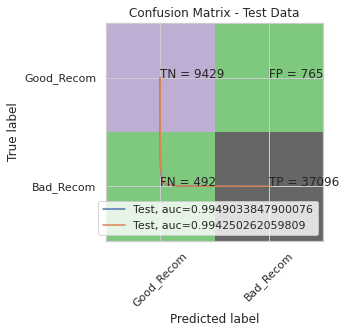

In [ ]:
# fungsi untuk fit dan prediction model XGBoost
  #Evaluasi XGboost model
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_final,y_train)
y_pred_train = XGBmodel.predict(X_train_final)
y_pred_test = XGBmodel.predict(X_test_final)

XGB_train_score = XGBmodel.score(X_train_final,y_train)
XGB_test_score = XGBmodel.score(X_test_final, y_test)
print('Train Model Accuracy: {0}'.format(XGB_train_score))
print('Test Model Accuracy: {0}'.format(XGB_test_score))

print("Confusion Matrix Train and Test")
Plot_confusion_matrix(y_train, y_pred_train)
Plot_confusion_matrix(y_test, y_pred_test)

# Probabilitas untuk setiap class
XGB_probs_train = XGBmodel.predict_proba(X_train_final)[:, 1]
XGB_probs_test = XGBmodel.predict_proba(X_test_final)[:, 1]

# kalkulasi roc auc
XGB_roc_value_train = roc_auc_score(y_train, XGB_probs_train)
XGB_roc_value_test = roc_auc_score(y_test, XGB_probs_test)


print("XGboost train roc_value: {0}" .format(XGB_roc_value_train))
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, XGB_probs_train)
threshold_train = thresholds_train[np.argmax(tpr_train-fpr_train)]
print("XGBoost train threshold: {0}".format(threshold_train))

print("XGboost test roc_value: {0}" .format(XGB_roc_value_test))
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, XGB_probs_test)
threshold_test = thresholds_test[np.argmax(tpr_test-fpr_test)]
print("XGBoost test threshold: {0}".format(threshold_test))


print("classification Report train")
print(classification_report(y_train, y_pred_train>threshold_train))
print("classification Report test")
print(classification_report(y_test, y_pred_test>threshold_test))


roc_auc_train = metrics.auc(fpr_train, tpr_train)
print("ROC for the train dataset",'{:.1%}'.format(roc_auc_train))
plt.plot(fpr_train, tpr_train,label="Test, auc="+str(roc_auc_train))
plt.legend(loc=4)
plt.show()


roc_auc_test = metrics.auc(fpr_test, tpr_test)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc_test))
plt.plot(fpr_test, tpr_test,label="Test, auc="+str(roc_auc_test))
plt.legend(loc=4)
plt.show()


In [ ]:
num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )
clf.fit(X_train_final,y_train)

#find predicted vallues
y_pred_l2_train = clf.predict(X_train_final)
y_pred_l2_test = clf.predict(X_test_final)


#Find predicted probabilities
y_pred_probs_l2_train = clf.predict_proba(X_train_final)[:,1]
y_pred_probs_l2_test = clf.predict_proba(X_test_final)[:,1]


# Accuaracy of L2/L1 models
Accuracy_l2_train = metrics.accuracy_score(y_pred=y_pred_l2_train, y_true=y_train)
Accuracy_l2_test = metrics.accuracy_score(y_pred=y_pred_l2_test, y_true=y_test)


print("Train Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2_train))
print("Test Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2_test))

from sklearn.metrics import roc_auc_score

l2_roc_value_train = roc_auc_score(y_train, y_pred_probs_l2_train)
print("l2 roc_value: {0}" .format(l2_roc_value_train))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_probs_l2_train)
threshold_train_l2 = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold_train_l2))


l2_roc_value_test = roc_auc_score(y_test, y_pred_probs_l2_test)
print("l2 roc_value: {0}" .format(l2_roc_value_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2_test)
threshold_test_l2 = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold_test_l2))


print("classification Report Train")
print(classification_report(y_train, y_pred_l2_train>threshold_train_l2))

print("classification Report Test")
print(classification_report(y_test, y_pred_l2_test>threshold_test_l2))

Train Accuracy of Logistic model with l2 regularisation : 0.9644267947490412
Test Accuracy of Logistic model with l2 regularisation : 0.9631032606420828
l2 roc_value: 0.9886195217948158
l2 threshold: 0.7962831558719278
l2 roc_value: 0.9886622673794452
l2 threshold: 0.8134788980406081
classification Report Train
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     40774
           1       0.98      0.98      0.98    150353

    accuracy                           0.96    191127
   macro avg       0.95      0.95      0.95    191127
weighted avg       0.96      0.96      0.96    191127

classification Report Test
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     10194
           1       0.98      0.98      0.98     37588

    accuracy                           0.96     47782
   macro avg       0.95      0.94      0.94     47782
weighted avg       0.96      0.96      0.96     47782



dari hasil pengamatan diatas. model Random Forest OverFitting, lalu XGBoost dan LogisticRegression paling ideal hasilnya menurut saya. setelah membandingkan saya ambil XGBoost sebagai model sementara yang paling bagus. sambil menunggu hasil Model MLP yang belum saya jalankan. Jadi, untuk sementara XGBoost yang saya ambil.

### MLP Model

In [ ]:
from sklearn.neural_network import MLPClassifier

[[ 9964   230]
 [  300 37288]]
Akurasi dari Multilayer Perceptron adalah: 98.89
Recall dari Multilayer Perceptron adalah: 99.20187293817176
Precision dari Multilayer Perceptron adalah: 99.38696092542246



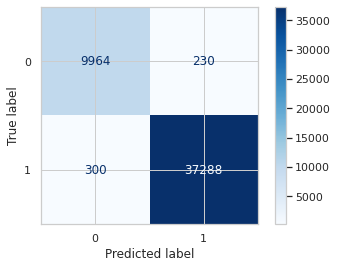

In [ ]:
mlp = MLPClassifier(max_iter=120, random_state=5, hidden_layer_sizes=(100,3))

mlp.fit(X_train_final,y_train)

predictionmlp = mlp.predict(X_test_final)
print(confusion_matrix(y_test, predictionmlp))
print("Akurasi dari Multilayer Perceptron adalah: %.2f" % (accuracy_score(y_test, predictionmlp)*100) )
print("Recall dari Multilayer Perceptron adalah:",recall_score(y_test, predictionmlp)*100)
print("Precision dari Multilayer Perceptron adalah:",precision_score(y_test, predictionmlp)*100)
print("")

plot_confusion_matrix(mlp, X_test_final, y_test, cmap=plt.cm.Blues, values_format='.0f')
sns.set(style=None)
plt.show()

In [ ]:
prediction_test = mlp.predict(X_test_final)
prediction_train = mlp.predict(X_train_final)
training_acc = accuracy_score(y_train, prediction_train)
testing_acc = accuracy_score(y_test, prediction_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))
print(classification_report(y_train, prediction_train))
print(classification_report(y_test, prediction_test))

Training Accuracy: 0.9907757668984497
Testing Accuracy: 0.9889079569712445
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     40774
           1       1.00      0.99      0.99    150353

    accuracy                           0.99    191127
   macro avg       0.98      0.99      0.99    191127
weighted avg       0.99      0.99      0.99    191127

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     10194
           1       0.99      0.99      0.99     37588

    accuracy                           0.99     47782
   macro avg       0.98      0.98      0.98     47782
weighted avg       0.99      0.99      0.99     47782



#### setelah melihat hasil dari XGBoost dan MLP, saya putuskan MLP sebagai model akhir saya. selain hasilnya yang maksimal, juga tidak Overfitting.

## <a name="p5">Cross Validation</a>

In [ ]:
kfold = KFold(10, shuffle=True)

scores = cross_validate(MLPClassifier(max_iter=120, random_state=5, hidden_layer_sizes=(100,3)), X_train_final,y_train, cv=kfold, scoring=['accuracy','precision','recall', 'roc_auc'])

print('Accuracy : ',scores['test_accuracy'].mean())
print('Precision : ',scores['test_precision'].mean())
print('Recall/ sensitivity : ',scores['test_recall'].mean())
print('AUC ROC : ',scores['test_roc_auc'].mean())

Accuracy :  0.9886358319756636
Precision :  0.9936846737618339
Recall/ sensitivity :  0.9918595483035771
AUC ROC :  0.9972453225793908


In [ ]:
r_probs = [0 for _ in range(len(y_test))]
mlp_probs = mlp.predict_proba(X_test_final)

mlp_probs = mlp_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('MLP: AUROC = %.5f' % (mlp_auc))

Random (chance) Prediction: AUROC = 0.500
MLP: AUROC = 0.99758


In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

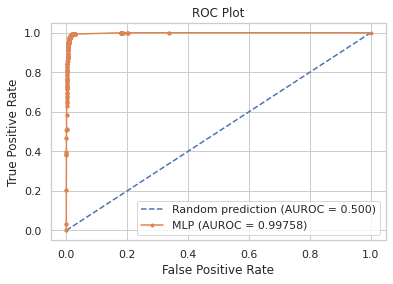

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP (AUROC = %0.5f)' % mlp_auc)

plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

Mengingat client dari PT. ID/X Partners adalah sebuah perusahaan lending company/Bank/dan sejenisnya, jadi kita sangat butuh model yang bagus dan benar - benar bisa mengklasifikasikan nasabah berdasarkan karakteristiknya ke dalam kategori good dan bad. terlebih lagi apabila perusahaan client tersebut adalah perusahaan besar dan memiliki nama, sudah pasti akan banyak orang yang akan meminjam keperusahaan tersebut. untuk itulah kita perlu model yang sangat bagus untuk menanggani banyaknya nasabah itu nantinya.  

## <a name="p6">Saving Model</a>

In [ ]:
import joblib

filename = '/content/drive/MyDrive/Dataset/MLP_model_V.2_ricky.sav'
joblib.dump(mlp, filename)

['/content/drive/MyDrive/Dataset/MLP_model_V.2_ricky.sav']

In [ ]:
MLP_model = joblib.load('/content/drive/MyDrive/Dataset/MLP_model_V.2_ricky.sav')
print(MLP_model.score(X_test_final, y_test))

0.9889079569712445


In [ ]:
kfold = KFold(10, shuffle=True)

scores = cross_validate(MLPClassifier(max_iter=120, random_state=5, hidden_layer_sizes=(100,3)), X_test_final,y_test, cv=kfold, scoring=['accuracy','precision','recall', 'roc_auc'])

print('Accuracy : ',scores['test_accuracy'].mean())
print('Precision : ',scores['test_precision'].mean())
print('Recall/ sensitivity : ',scores['test_recall'].mean())
print('AUC ROC : ',scores['test_roc_auc'].mean())

Accuracy :  0.986584848547753
Precision :  0.9926983098575294
Recall/ sensitivity :  0.9902301830980514
AUC ROC :  0.9963222452330195
